# Limpiza de datos
## Carga del DS

In [33]:
pip install wordcloud matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: C:\Users\rodyv\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [34]:
import pandas as pd
import numpy as np

# Cargar el archivo csv
# se agrego sep=';' dado que el campo seguro de salud tiene comas
df = pd.read_csv('../datasets/Niños_menores_de_36_meses_con_dx_de_anemia_en_la_Región_ Junín.csv', encoding='unicode_escape', sep=';') 
df[df.columns[4:20]].head(10)


,valor_lab_dx,fecha_dosaje_dx,hb_dx,fecha_dosaje_mes,hb,fecha_dosaje_3_meses,hb_tresmeses,fecha_dosaje_6_meses,hb_seismeses,fecha_recup,recup,fecha_supT1,fecha_supT2,fecha_supT3,fecha_supT4,fecha_supT5
0,LEV,21/06/2024,12.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,21/06/2024,NaN,NaN,NaN,NaN
1,LEV,21/06/2024,14.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2,SEV,20/06/2024,12.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,20/06/2024,NaN,NaN,NaN,NaN
3,LEV,20/06/2024,12.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,20/06/2024,NaN,NaN,NaN,NaN
4,MOD,20/06/2024,9.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,20/06/2024,NaN,NaN,NaN,NaN
5,LEV,20/06/2024,12.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,20/06/2024,NaN,NaN,NaN,NaN
6,NaN,20/06/2024,9.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,20/06/2024,NaN,NaN,NaN,NaN
7,MOD,19/06/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,19/06/2024,NaN,NaN,NaN,NaN
8,MOD,19/06/2024,11.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,19/06/2024,NaN,NaN,NaN,NaN
9,LEV,19/06/2024,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,19/06/2024,NaN,NaN,NaN,NaN


## Depturacion de datos
1. Manejar missing values
3. Identificar outliers
4. Corregir data incosistente
5. Eliminar duplicados
  

### Corregir formatos

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12486 entries, 0 to 12485
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   num_doc                 12486 non-null  float64
 1   seguro                  12486 non-null  object 
 2   fecha_nac               12486 non-null  object 
 3   fecha_dx                12486 non-null  object 
 4   valor_lab_dx            12281 non-null  object 
 5   fecha_dosaje_dx         11567 non-null  object 
 6   hb_dx                   10577 non-null  float64
 7   fecha_dosaje_mes        8379 non-null   object 
 8   hb                      7585 non-null   float64
 9   fecha_dosaje_3_meses    6836 non-null   object 
 10  hb_tresmeses            6174 non-null   float64
 11  fecha_dosaje_6_meses    5783 non-null   object 
 12  hb_seismeses            5378 non-null   float64
 13  fecha_recup             5859 non-null   object 
 14  recup                   12486 non-null

In [36]:
col_date = [
    'fecha_nac', 'fecha_dx', 'fecha_dosaje_3_meses', 'fecha_dosaje_6_meses',
    'fecha_dosaje_dx', 'fecha_recup', 'fecha_supT1', 'fecha_supT2',
    'fecha_supT3', 'fecha_supT4', 'fecha_supT5', 'fecha_supT6', 'fecha_ta', 'fecha_dosaje_mes'
]
for col in col_date:
    df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True) 

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12486 entries, 0 to 12485
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   num_doc                 12486 non-null  float64       
 1   seguro                  12486 non-null  object        
 2   fecha_nac               12486 non-null  datetime64[ns]
 3   fecha_dx                12486 non-null  datetime64[ns]
 4   valor_lab_dx            12281 non-null  object        
 5   fecha_dosaje_dx         11567 non-null  datetime64[ns]
 6   hb_dx                   10577 non-null  float64       
 7   fecha_dosaje_mes        8379 non-null   datetime64[ns]
 8   hb                      7585 non-null   float64       
 9   fecha_dosaje_3_meses    6836 non-null   datetime64[ns]
 10  hb_tresmeses            6174 non-null   float64       
 11  fecha_dosaje_6_meses    5783 non-null   datetime64[ns]
 12  hb_seismeses            5378 non-null   float6

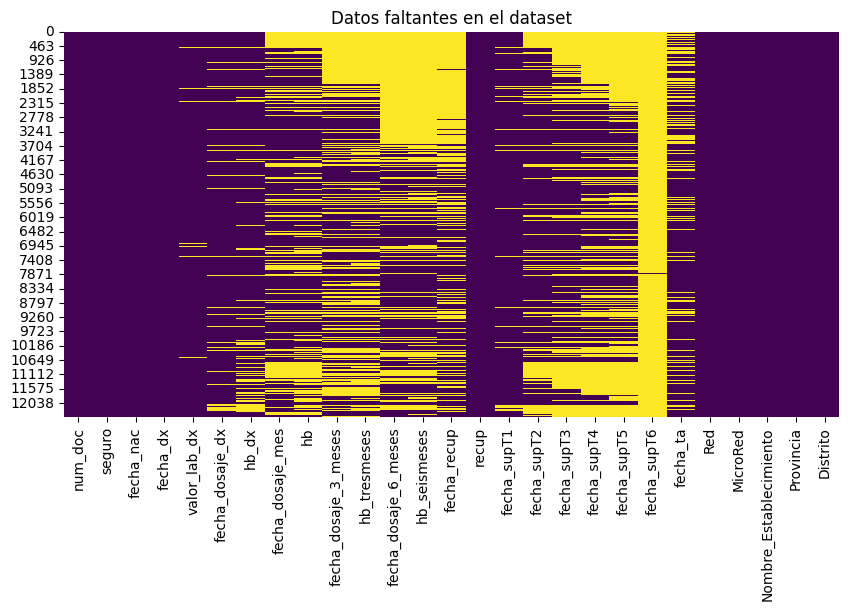

In [37]:
# graficar los datos faltantes
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Datos faltantes en el dataset')
plt.show()

In [38]:
miss_d = df.isnull().sum()
print(miss_d)

num_doc                       0
seguro                        0
fecha_nac                     0
fecha_dx                      0
valor_lab_dx                205
fecha_dosaje_dx             919
hb_dx                      1909
fecha_dosaje_mes           4107
hb                         4901
fecha_dosaje_3_meses       5650
hb_tresmeses               6312
fecha_dosaje_6_meses       6703
hb_seismeses               7108
fecha_recup                6627
recup                         0
fecha_supT1                 981
fecha_supT2                3322
fecha_supT3                4942
fecha_supT4                6297
fecha_supT5                7371
fecha_supT6               12455
fecha_ta                   3156
Red                           0
MicroRed                      0
Nombre_Establecimiento        0
Provincia                     0
Distrito                      0
dtype: int64


### Datos Faltantes y Duplicados

1. Pueden haber registros enteramente duplicados
2. Existen datos faltantes en los tratamientos y suplementaciones, asi como en sus fechas.
3. Tambien existen datos faltantes en el valor inicial de hemoglobina y en la fecha de la misma


### Acciones
1. Eliminacion de datos enteramente duplicados y verificar si hay coincidencias por id
2. Enriquecer los datos con el numero de dosajes de seguimiento y suplementaciones 
3. Determinar lo sucedido con los valores faltantes y preprocesarlos
   

### Eliminacion de datos enteramente duplicados y verificar coincidencias por id

In [39]:
# Eliminar registros duplicados
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

# coincidencias de dnis

print(df['num_doc'].value_counts().head(10))

# ver los registros con dnis repetidos
print(df[df['num_doc'] == 6.723610e+15])


(12486, 27)
(12453, 27)
num_doc
6.723610e+15    24
6.727140e+15    23
6.722890e+15    22
6.722800e+15    21
6.717160e+15    18
6.726040e+15    18
6.720330e+15    18
6.726830e+15    18
6.717170e+15    17
6.716570e+15    17
Name: count, dtype: int64
            num_doc seguro  fecha_nac   fecha_dx valor_lab_dx fecha_dosaje_dx  \
1043   6.723610e+15    1,  2022-04-17 2024-04-17          LEV      2024-04-17   
1161   6.723610e+15    1,  2022-04-05 2024-04-10          MOD      2024-04-10   
2094   6.723610e+15    1,  2022-02-27 2024-03-01          LEV      2024-03-01   
4502   6.723610e+15    1,  2021-11-07 2023-11-07          LEV      2023-11-07   
4864   6.723610e+15    1,  2021-09-22 2023-10-22          LEV      2023-10-22   
5017   6.723610e+15    1,  2021-10-14 2023-10-14          LEV      2023-10-14   
6547   6.723610e+15    1,  2021-07-27 2023-08-01          LEV      2023-08-01   
7131   6.723610e+15    1,  2022-01-03 2023-07-01          LEV             NaT   
7455   6.723610e+15    

Nacieron en diferentes dias, asi que son diferentes personas

### Determinar lo sucedido con los valores faltantes y preprocesarlos


205 registros sin diagnostico, representan un 1.65%
918 registros sin fecha de prueba diagnostica o hemoglobina, representan un 7.37%
918 registros sin fecha de prueba diagnostica, representan un 7.37%
1906 registros sin hemoglobina, representan un 15.31%


Text(0.5, 1.0, 'Distribución de valores de hemoglobina')

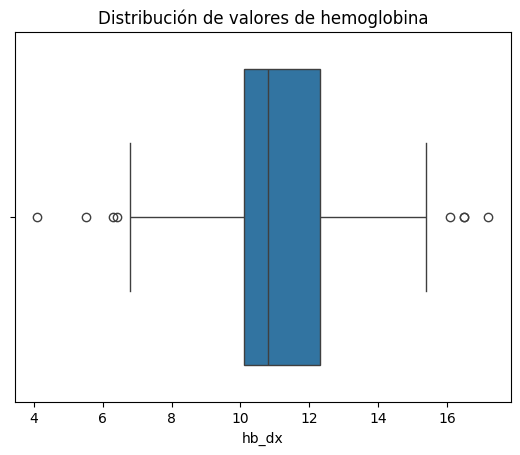

In [40]:
# valor_lab_dx resultado de la prueba diagnostica
df_sdx = df[df["valor_lab_dx"].isnull()]
# parece que tienen fecha de prueba diagnostica pero no tienen resultado
print(f"{len(df_sdx)} registros sin diagnostico, representan un {len(df_sdx)/len(df)*100:.2f}%") 

# sin fecha de prueba diagnostica o hb
df_spfdx = df[df["fecha_dosaje_dx"].isnull() & df["hb_dx"].isnull()] 
print(f"{len(df_spfdx)} registros sin fecha de prueba diagnostica o hemoglobina, representan un {len(df_spfdx)/len(df)*100:.2f}%")
#df_sdx.head(10)

# sin fecha de prueba diagnostica
df_spdx = df[df["fecha_dosaje_dx"].isnull()]
print(f"{len(df_spdx)} registros sin fecha de prueba diagnostica, representan un {len(df_spdx)/len(df)*100:.2f}%")
#df_sdx.head(10)

# sin hemoglobina
df_shb = df[df["hb_dx"].isnull()]
print(f"{len(df_shb)} registros sin hemoglobina, representan un {len(df_shb)/len(df)*100:.2f}%")
df_shb.head(10)

sns.boxplot(x='hb_dx', data=df)
plt.title('Distribución de valores de hemoglobina')



La anemia puede entenderse como valores bajos de hemoglobina, hemocrocito o eritrocitos, segun el [Manual MSD.](https://www.msdmanuals.com/es/professional/hematolog%C3%ADa-y-oncolog%C3%ADa/abordaje-del-paciente-con-anemia/evaluaci%C3%B3n-de-la-anemia)

En consecuencia, algunos de los valores atípicos (outliers) podrían no provenir de errores en la recopilación de datos. Sin embargo, hasta confirmarlo, se procederá con una limpieza utilizando el método de Winsorize.

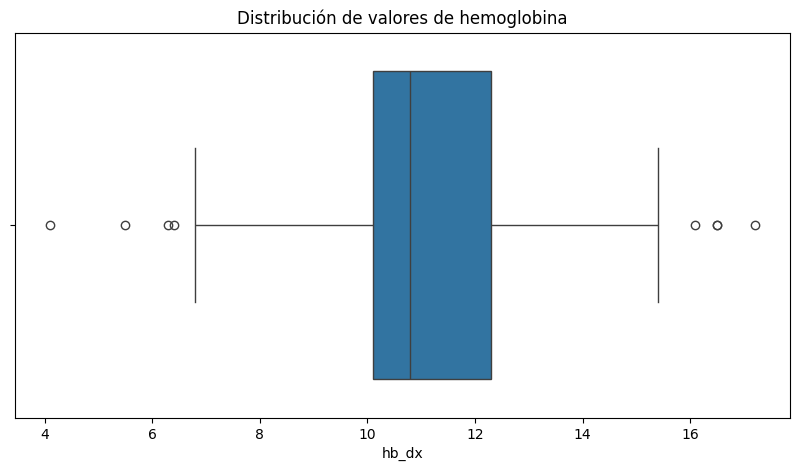

C:\Users\rodyv\AppData\Local\Temp\ipykernel_3448\3795887636.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['hb_dx'].fillna(df['hb_dx'].median(), inplace=True)
C:\Users\rodyv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


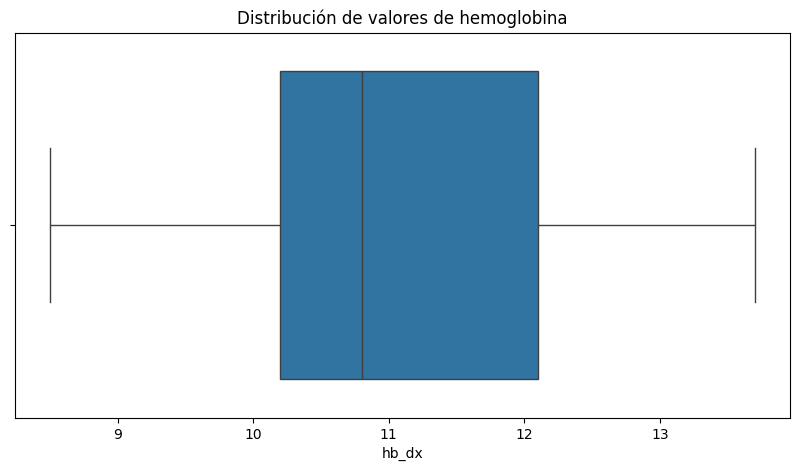

In [41]:
# limpieza de outliers con winsorize y rellenar valores faltantes
# Si hay outliers se usa la mediana, si no hay se usa la media

from scipy.stats.mstats import winsorize

plt.figure(figsize=(10,5))
sns.boxplot(x='hb_dx', data=df)
plt.title('Distribución de valores de hemoglobina')
plt.show()

# Rellenar los valores faltantes de hemoglobina con la mediana
df['hb_dx'].fillna(df['hb_dx'].median(), inplace=True)

df['hb_dx'] = winsorize(df['hb_dx'], limits=[0.01, 0.01], nan_policy='omit') 
df['hb_dx'].describe()

# graficar la distribución de los datos

plt.figure(figsize=(10,5))
sns.boxplot(x='hb_dx', data=df)
plt.title('Distribución de valores de hemoglobina')
plt.show()







Se realizo una limpieza de outliders remplazandolos por los valores limites (en 1%). Tambien se rellenaron los valores faltantes con la mediana por la precencia de outliders

### Tiempo de Recuperacion, Edad en diagnostico, num tratamientos, num dosajes de seguimiento

In [42]:
# Enriqucimiento de datos

# NUMERO DE SUPLEMENTOS 

# Si hay fecha de suplemento, contamos
df['num_sup'] = 0 * len(df)

for i in range(1, 7): # fecha_supT1-6
    df['num_sup'] += 1 * df[f'fecha_supT{i}'].notnull()

# NUMERO DE DOSJAES DE SEGUIMIENTO, se excluye el dosaje diagnóstico

# Si hay fecha o valor dx de suplemento

df['num_dos_seg'] = 0 * len(df)

#df['num_dos'] += df[['fecha_dosaje_dx', 'hb_dx']].notnull().any(axis=1) # dosaje diagnóstico
df['num_dos_seg'] += df[['fecha_dosaje_mes', 'hb']].notnull().all(axis=1)
df['num_dos_seg'] += df[['fecha_dosaje_3_meses', 'hb_tresmeses']].notnull().all(axis=1)
df['num_dos_seg'] += df[['fecha_dosaje_6_meses', 'hb_seismeses']].notnull().all(axis=1)


In [43]:

# EDAD EN MESES AL MOMENTO DEL DIAGNOSTICO
def month_diff(a, b):
    return 12 * (a.dt.year - b.dt.year) + (a.dt.month - b.dt.month) + (a.dt.day - b.dt.day) / 30

# Valores nulos en edad_diagnostico

df['edad_diagnostico'] = month_diff(df['fecha_dx'], df['fecha_nac']) # meses

# Tiempo de recuperación
df['tiempo_recup'] = month_diff(df['fecha_recup'], df['fecha_dx']) # meses


print(f"Valores nulos en edad_diagnostico: {df['edad_diagnostico'].isnull().sum() / len(df) * 100:.2f}%")
print(f"Edades negativas: {len(df.query('edad_diagnostico < 0'))}")

# validar que el tiempo de recuperación sea coherente
print(f"\nPorcentaje de recuperados sin tiempo de recuperación: {len(df[['tiempo_recup', 'recup']].query('recup == 1 and tiempo_recup.isnull()')) / len(df) * 100:.2f}%")
print(f"Recuperados con tiempo de recuperacion negativo: {len(df[['tiempo_recup', 'recup']].query('recup == 1 and tiempo_recup < 0'))}")

print(f"\nNo recuperados con tiempo de recuperacion: {len(df[['tiempo_recup', 'recup']].query('recup == 0 and tiempo_recup'))}") 
print(f"No recuperados sin tiempo de recuperacion: {len(df[['tiempo_recup', 'recup']].query('recup == 0 and tiempo_recup.isnull()'))}")


Valores nulos en edad_diagnostico: 0.00%
Edades negativas: 0

Porcentaje de recuperados sin tiempo de recuperación: 0.00%
Recuperados con tiempo de recuperacion negativo: 0

No recuperados con tiempo de recuperacion: 0
No recuperados sin tiempo de recuperacion: 6604


C:\Users\rodyv\AppData\Local\Temp\ipykernel_3448\3702006621.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='num_sup'


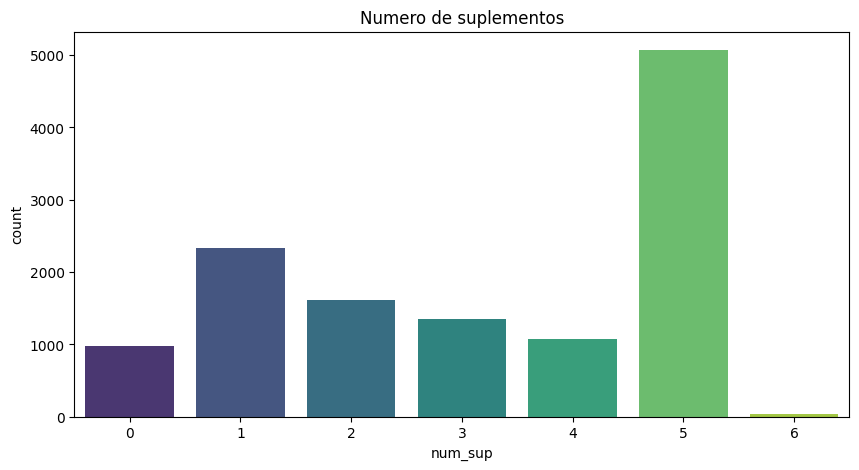

C:\Users\rodyv\AppData\Local\Temp\ipykernel_3448\3702006621.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='num_dos_seg'


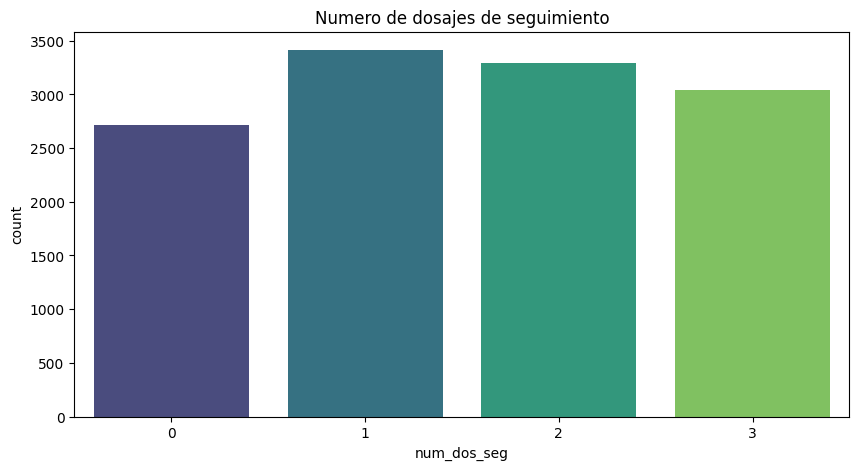

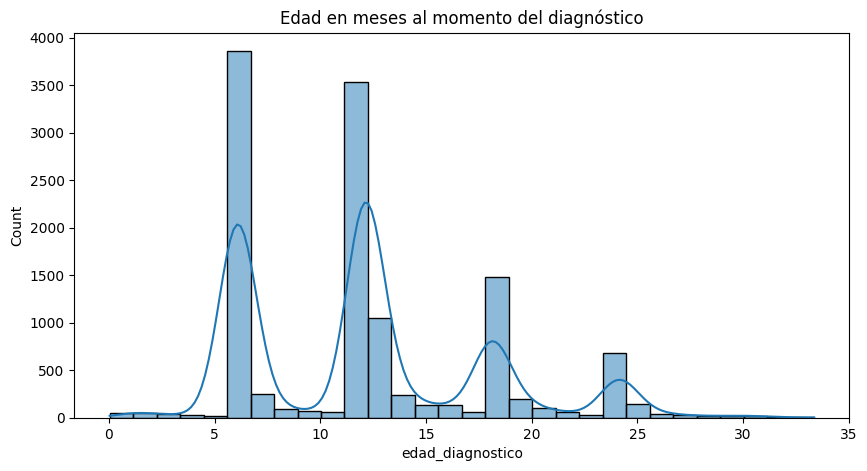

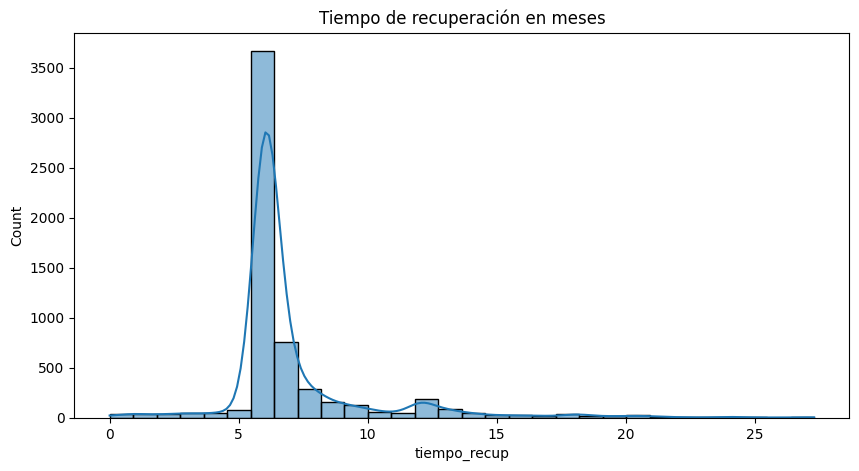

<Axes: >

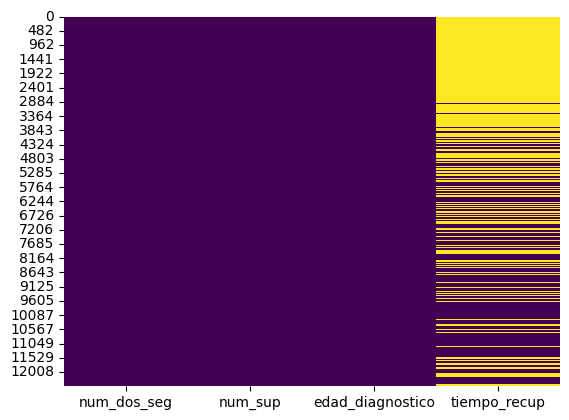

In [44]:


# Analisis Explaratorio de Datos
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='num_sup'
              , palette='viridis'
              , order=range(0, 7))
    
plt.title('Numero de suplementos')
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='num_dos_seg'
              , palette='viridis'
              , order=range(0, 4))
 
plt.title('Numero de dosajes de seguimiento')
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(data=df, x='edad_diagnostico', bins=30, kde=True)
plt.title('Edad en meses al momento del diagnóstico')
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(data=df, x='tiempo_recup', bins=30, kde=True)
plt.title('Tiempo de recuperación en meses')
plt.show()

sns.heatmap(df[['num_dos_seg', 'num_sup', 'edad_diagnostico', 'tiempo_recup']].isnull(), cbar=False, cmap='viridis')



In [45]:
print(f"Infantes que no se llegaron a recuperar en el rango {df['tiempo_recup'].isnull().sum() / len(df) * 100:.2f}%")
ifr = len(df.query('recup == 1'))
print(f"Infantes que se recuperaron en el rango {ifr / len(df) * 100:.2f}% siendo {ifr} registros de {len(df)}")





Infantes que no se llegaron a recuperar en el rango 53.03%
Infantes que se recuperaron en el rango 46.97% siendo 5849 registros de 12453


No se encuentra manera clara de diferenciar la cifra negra de recuperacion con los pacientes no recuperados. Por ello se tomaran los valores nulos como pacientes no recuperados

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12453 entries, 0 to 12485
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   num_doc                 12453 non-null  float64       
 1   seguro                  12453 non-null  object        
 2   fecha_nac               12453 non-null  datetime64[ns]
 3   fecha_dx                12453 non-null  datetime64[ns]
 4   valor_lab_dx            12248 non-null  object        
 5   fecha_dosaje_dx         11535 non-null  datetime64[ns]
 6   hb_dx                   12453 non-null  float64       
 7   fecha_dosaje_mes        8362 non-null   datetime64[ns]
 8   hb                      7570 non-null   float64       
 9   fecha_dosaje_3_meses    6822 non-null   datetime64[ns]
 10  hb_tresmeses            6161 non-null   float64       
 11  fecha_dosaje_6_meses    5770 non-null   datetime64[ns]
 12  hb_seismeses            5366 non-null   float64    

In [47]:
# renombrar columnas
df.rename(columns={'hb': 'hb_unmes'}, inplace=True)

Diagnostico del laboratorio

In [48]:
df['valor_lab_dx'].isnull().sum()
print(f"valores nulos en diagnostico {df['valor_lab_dx'].isnull().sum() / len(df) * 100:.2f}%")

valores nulos en diagnostico 1.65%


In [49]:
df['valor_lab_dx'].value_counts()

valor_lab_dx
LEV    7979
MOD    4188
SEV      81
Name: count, dtype: int64

In [50]:
df[['valor_lab_dx', 'hb_dx']].query('valor_lab_dx == "LEV"').describe()

,hb_dx
count,7979.000000
mean,11.275072
std,1.112545
min,8.500000
25%,10.400000
50%,10.800000
75%,12.400000
max,13.700000


In [51]:
df[['valor_lab_dx', 'hb_dx']].query('valor_lab_dx == "MOD"').describe()

,hb_dx
count,4188.000000
mean,10.595554
std,1.110288
min,8.500000
25%,9.700000
50%,10.800000
75%,11.500000
max,13.700000


In [52]:
df[['valor_lab_dx', 'hb_dx']].query('valor_lab_dx == "SEV"').describe()

,hb_dx
count,81.000000
mean,9.692593
std,1.125364
min,8.500000
25%,8.500000
50%,9.500000
75%,10.800000
max,12.100000


No se encuentra un patron diagnostico claro que dependa unicamente del valor de hemoglobina. Se procede a reemplazar con la moda  

In [53]:
# reemplazar valores de diagnostico
df['valor_lab_dx'].replace({'LEV': 0, 'MOD': 1, 'SEV': 2}, inplace=True)

# si es null se reemplaza por 0 (moda)
df['valor_lab_dx'].fillna(df['valor_lab_dx'].mode()[0], inplace=True) # mode retorna una serie xd

print(f"valores nulos en diagnostico {df['valor_lab_dx'].isnull().sum() / len(df) * 100:.2f}%")

print(df['valor_lab_dx'].value_counts())

valores nulos en diagnostico 0.00%
valor_lab_dx
0.0    8184
1.0    4188
2.0      81
Name: count, dtype: int64


C:\Users\rodyv\AppData\Local\Temp\ipykernel_3448\2363572122.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['valor_lab_dx'].replace({'LEV': 0, 'MOD': 1, 'SEV': 2}, inplace=True)
C:\Users\rodyv\AppData\Local\Temp\ipykernel_3448\2363572122.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[

Limpiar seguro

In [54]:
df['seguro'].value_counts()

seguro
1,           11547
2,             499
0,             254
1, 2,           49
3,              41
4,              33
0, 1,           10
2, 4,            8
1, 4,            6
1, 3,            3
0, 2,            1
1, 2, 4,         1
0, 2, 4,         1
Name: count, dtype: int64

In [55]:
# Separar las combinaciones de seguros en una lista de valores
df['seguro_list'] = df['seguro'].str.split(', ')

# Crear columnas binarias para cada tipo de seguro
for seguro in ['0', '1', '2', '3', '4']:
    df[f'seguro_{seguro}'] = df['seguro_list'].apply(lambda x: int(seguro in x))

df.drop(columns=['seguro_list'], inplace=True)

df[['seguro', 'seguro_0', 'seguro_1', 'seguro_2', 'seguro_3', 'seguro_4']].head()



,seguro,seguro_0,seguro_1,seguro_2,seguro_3,seguro_4
0,"1,",0,1,0,0,0
1,"1,",0,1,0,0,0
2,"1,",0,1,0,0,0
3,"1,",0,1,0,0,0
4,"1,",0,1,0,0,0


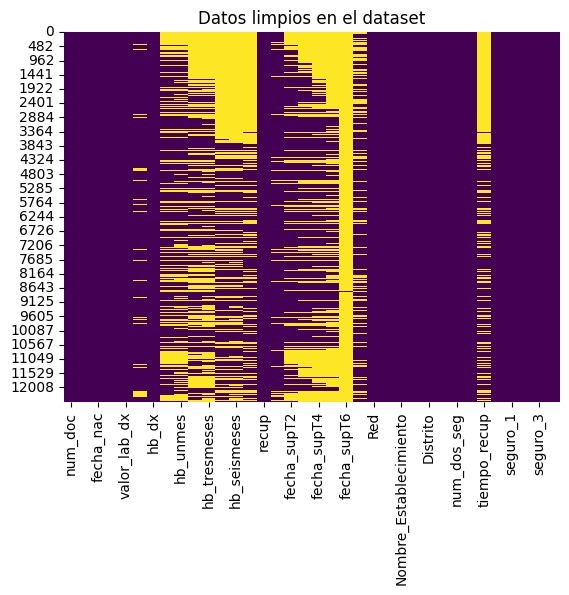

In [56]:
# Guardar el dataset limpio
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Datos limpios en el dataset')
df.to_csv('../datasets/Niños_menores_de_36_meses_con_dx_de_anemia_en_la_Región_ Junín_enriquecido.csv', index=False)



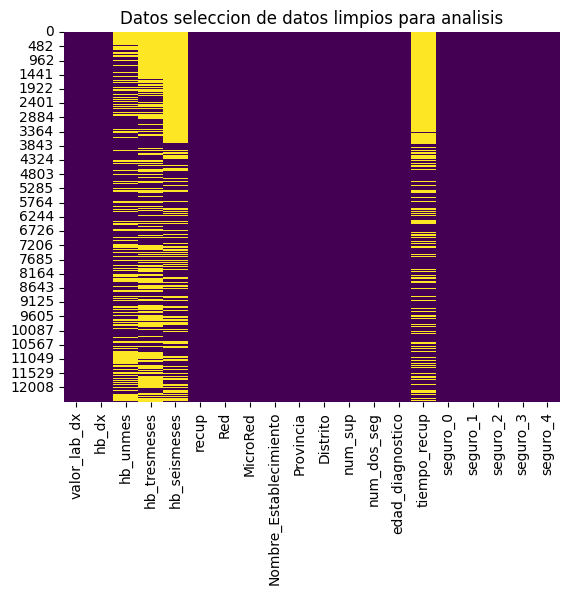

In [57]:
df.drop(columns=['num_doc', 'fecha_nac', 'fecha_dx', 'fecha_dosaje_3_meses', 'fecha_dosaje_6_meses',
                    'fecha_dosaje_dx', 'fecha_recup', 'fecha_supT1', 'fecha_supT2',
                    'fecha_supT3', 'fecha_supT4', 'fecha_supT5', 'fecha_supT6', 'fecha_ta', 'fecha_dosaje_mes', 'seguro'], inplace=True)

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Datos seleccion de datos limpios para analisis')

df.to_csv('../datasets/Niños_menores_de_36_meses_con_dx_de_anemia_en_la_Región_ Junín_limpio.csv', index=False)
